In [2]:
import pandas as pd
import numpy as np
import missingno as msno  
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import math


In [3]:
df = pd.read_csv("Datas.csv")

In [4]:
df.head()

,customer_unique_id,customer_city,customer_state,order_id,nombre_produits,nombre_categories,vendeurs,vendeur_ville,vendeur_etat,moyen_paiement,...,distance_km,retard_livraison_jours,latitude_client,longitude_client,latitude_vendeur,longitude_vendeur,frequence_achat,cout_moyen_par_produit,diversite_des_achats,impact_des_frais_de_transport
0,0000366f3b9a7992bf8c76cfdf3221e2,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,1,1,1,piracicaba,SP,credit_card,...,110.568788,-5.0,-23.340235,-46.830140,-22.708702,-47.664701,0.008621,141.90,1.0,0.084567
1,0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,SP,3594e05a005ac4d06a72673270ef9ec9,1,1,1,sao paulo,SP,credit_card,...,22.168364,-5.0,-23.559115,-46.787626,-23.490759,-46.583369,0.008403,27.19,1.0,0.304892
2,0000f46a3911fa3c0805444483337064,sao jose,SC,b33ec3b699337181488304f362a6b734,1,1,1,campo limpo paulista,SP,credit_card,...,516.939550,-2.0,-27.542880,-48.633426,-23.211746,-46.762875,0.001845,86.22,1.0,0.199722
3,0000f6ccb0745a6a4b88665a16c9f078,belem,PA,41272756ecddd9a9ed0180413cc22fb6,1,1,1,sao paulo,SP,credit_card,...,2481.290615,-12.0,-1.312214,-48.483159,-23.543150,-46.490101,0.003067,43.62,1.0,0.404172
4,0004aac84e0df4da2b147fca70cf8255,sorocaba,SP,d957021f1127559cd947b62533f484f7,1,1,1,jacarei,SP,credit_card,...,154.508100,-8.0,-23.505548,-47.469705,-23.302318,-45.971888,0.003413,196.89,1.0,0.085784


In [ ]:

# Afficher un aperçu des valeurs manquantes
print(" Aperçu des valeurs manquantes :\n")
print(df.isnull().sum())  # Nombre de valeurs NaN par colonne



🔎 Aperçu des valeurs manquantes :

customer_unique_id                         0
customer_city                              0
customer_state                             0
order_id                                   0
nombre_produits                            0
nombre_categories                          0
vendeurs                                   0
vendeur_ville                              0
vendeur_etat                               0
moyen_paiement                             0
tranche_paiement                           0
prix_total                                 0
frais_transport                            0
date_commande                              0
note_moyenne_avis                        749
nombre_commandes                           0
montant_moyen_depense                      0
temps_depuis_derniere_commande_jours       0
distance_km                              489
retard_livraison_jours                  2190
latitude_client                          274
longitude_client    

In [ ]:
print("\n Pourcentage des valeurs manquantes :\n")
print((df.isnull().sum() / len(df)) * 100)  # En pourcentage



🔎 Pourcentage des valeurs manquantes :

customer_unique_id                      0.000000
customer_city                           0.000000
customer_state                          0.000000
order_id                                0.000000
nombre_produits                         0.000000
nombre_categories                       0.000000
vendeurs                                0.000000
vendeur_ville                           0.000000
vendeur_etat                            0.000000
moyen_paiement                          0.000000
tranche_paiement                        0.000000
prix_total                              0.000000
frais_transport                         0.000000
date_commande                           0.000000
note_moyenne_avis                       0.759134
nombre_commandes                        0.000000
montant_moyen_depense                   0.000000
temps_depuis_derniere_commande_jours    0.000000
distance_km                             0.495616
retard_livraison_jours      

<Figure size 1000x600 with 0 Axes>

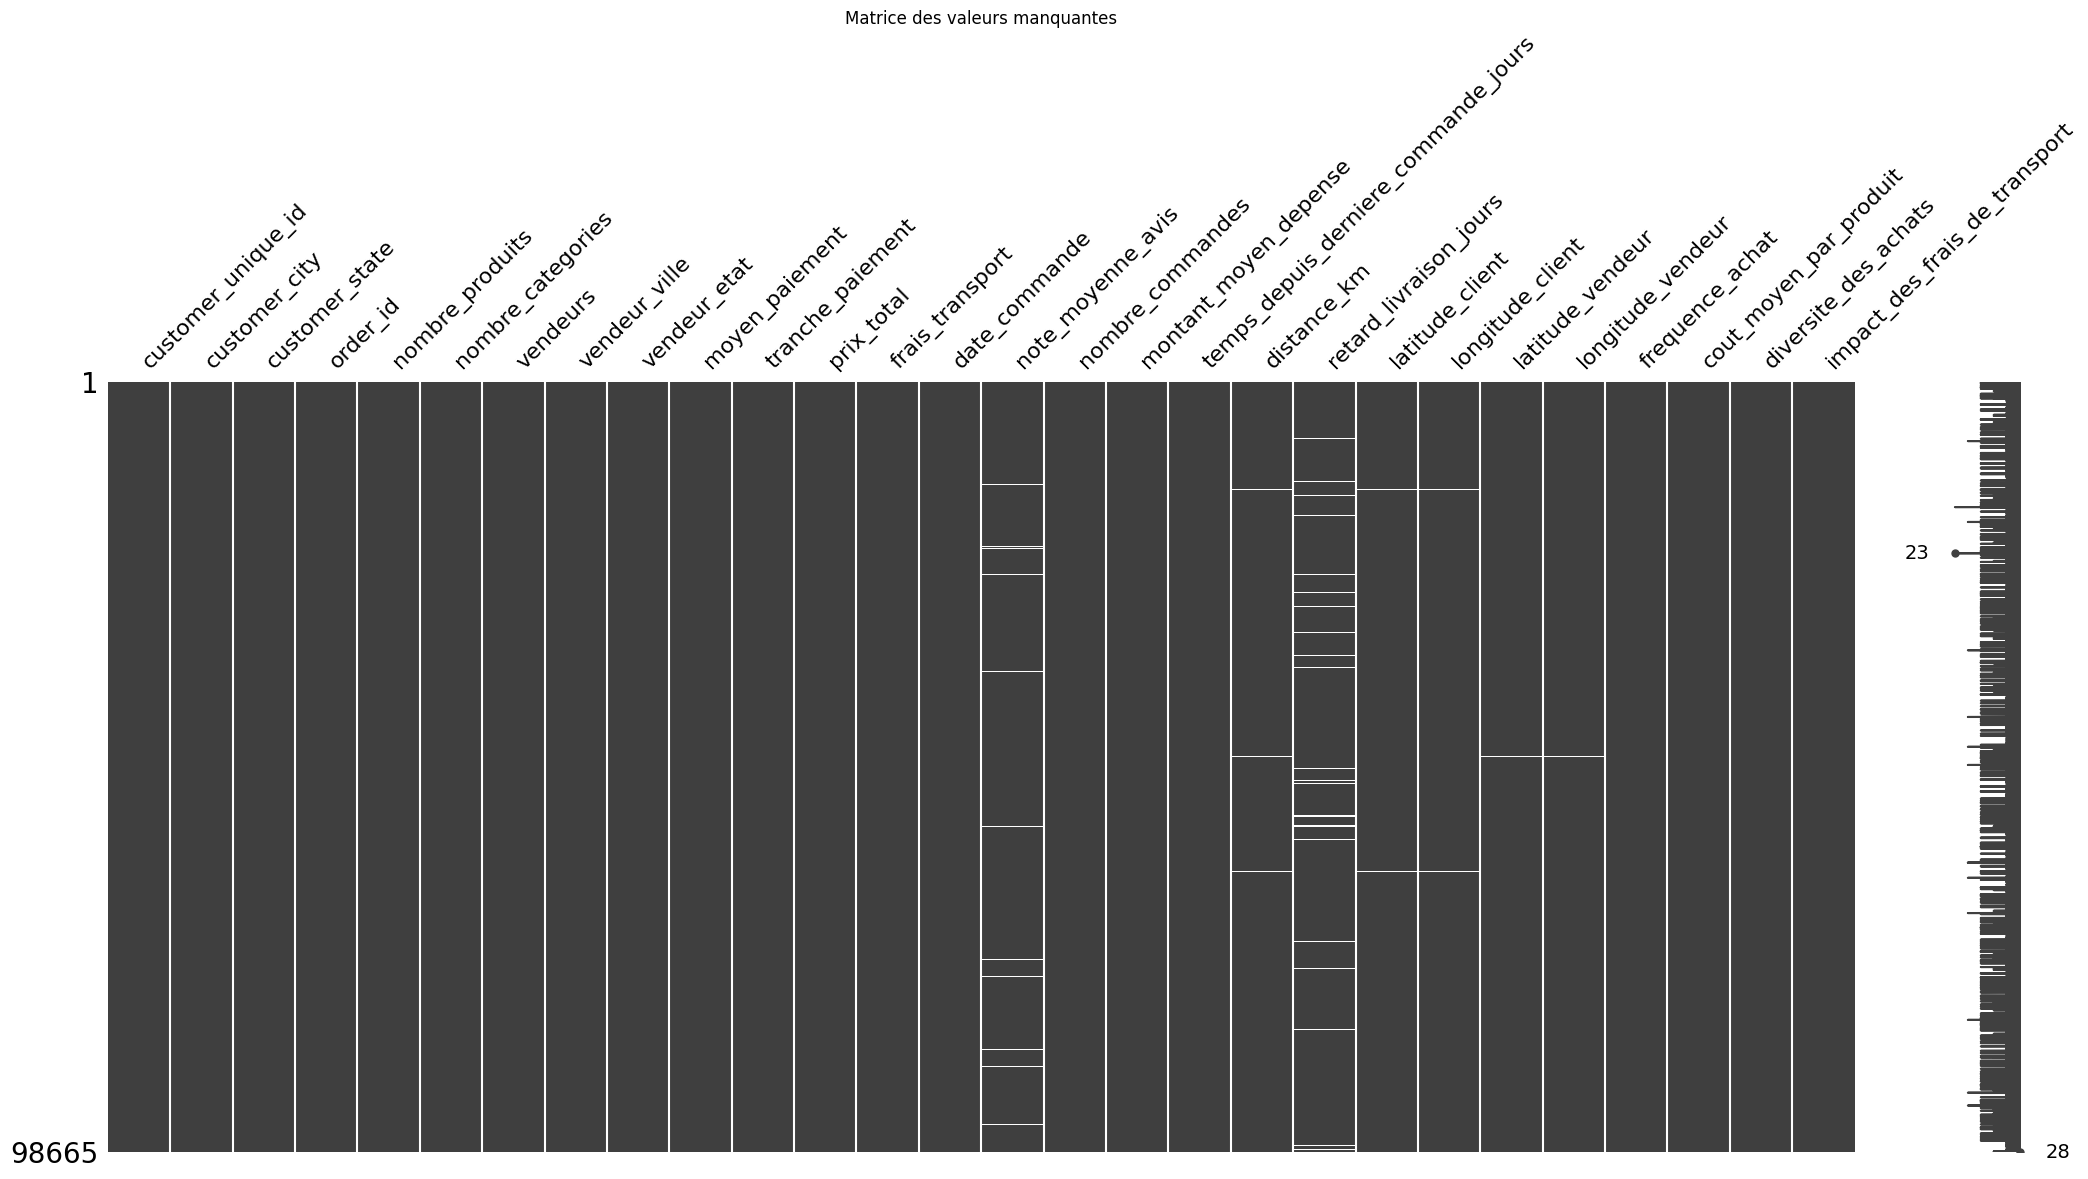

In [7]:
# Visualiser les valeurs manquantes sous forme de matrice
plt.figure(figsize=(10,6))
msno.matrix(df)
plt.title("Matrice des valeurs manquantes")
plt.show()

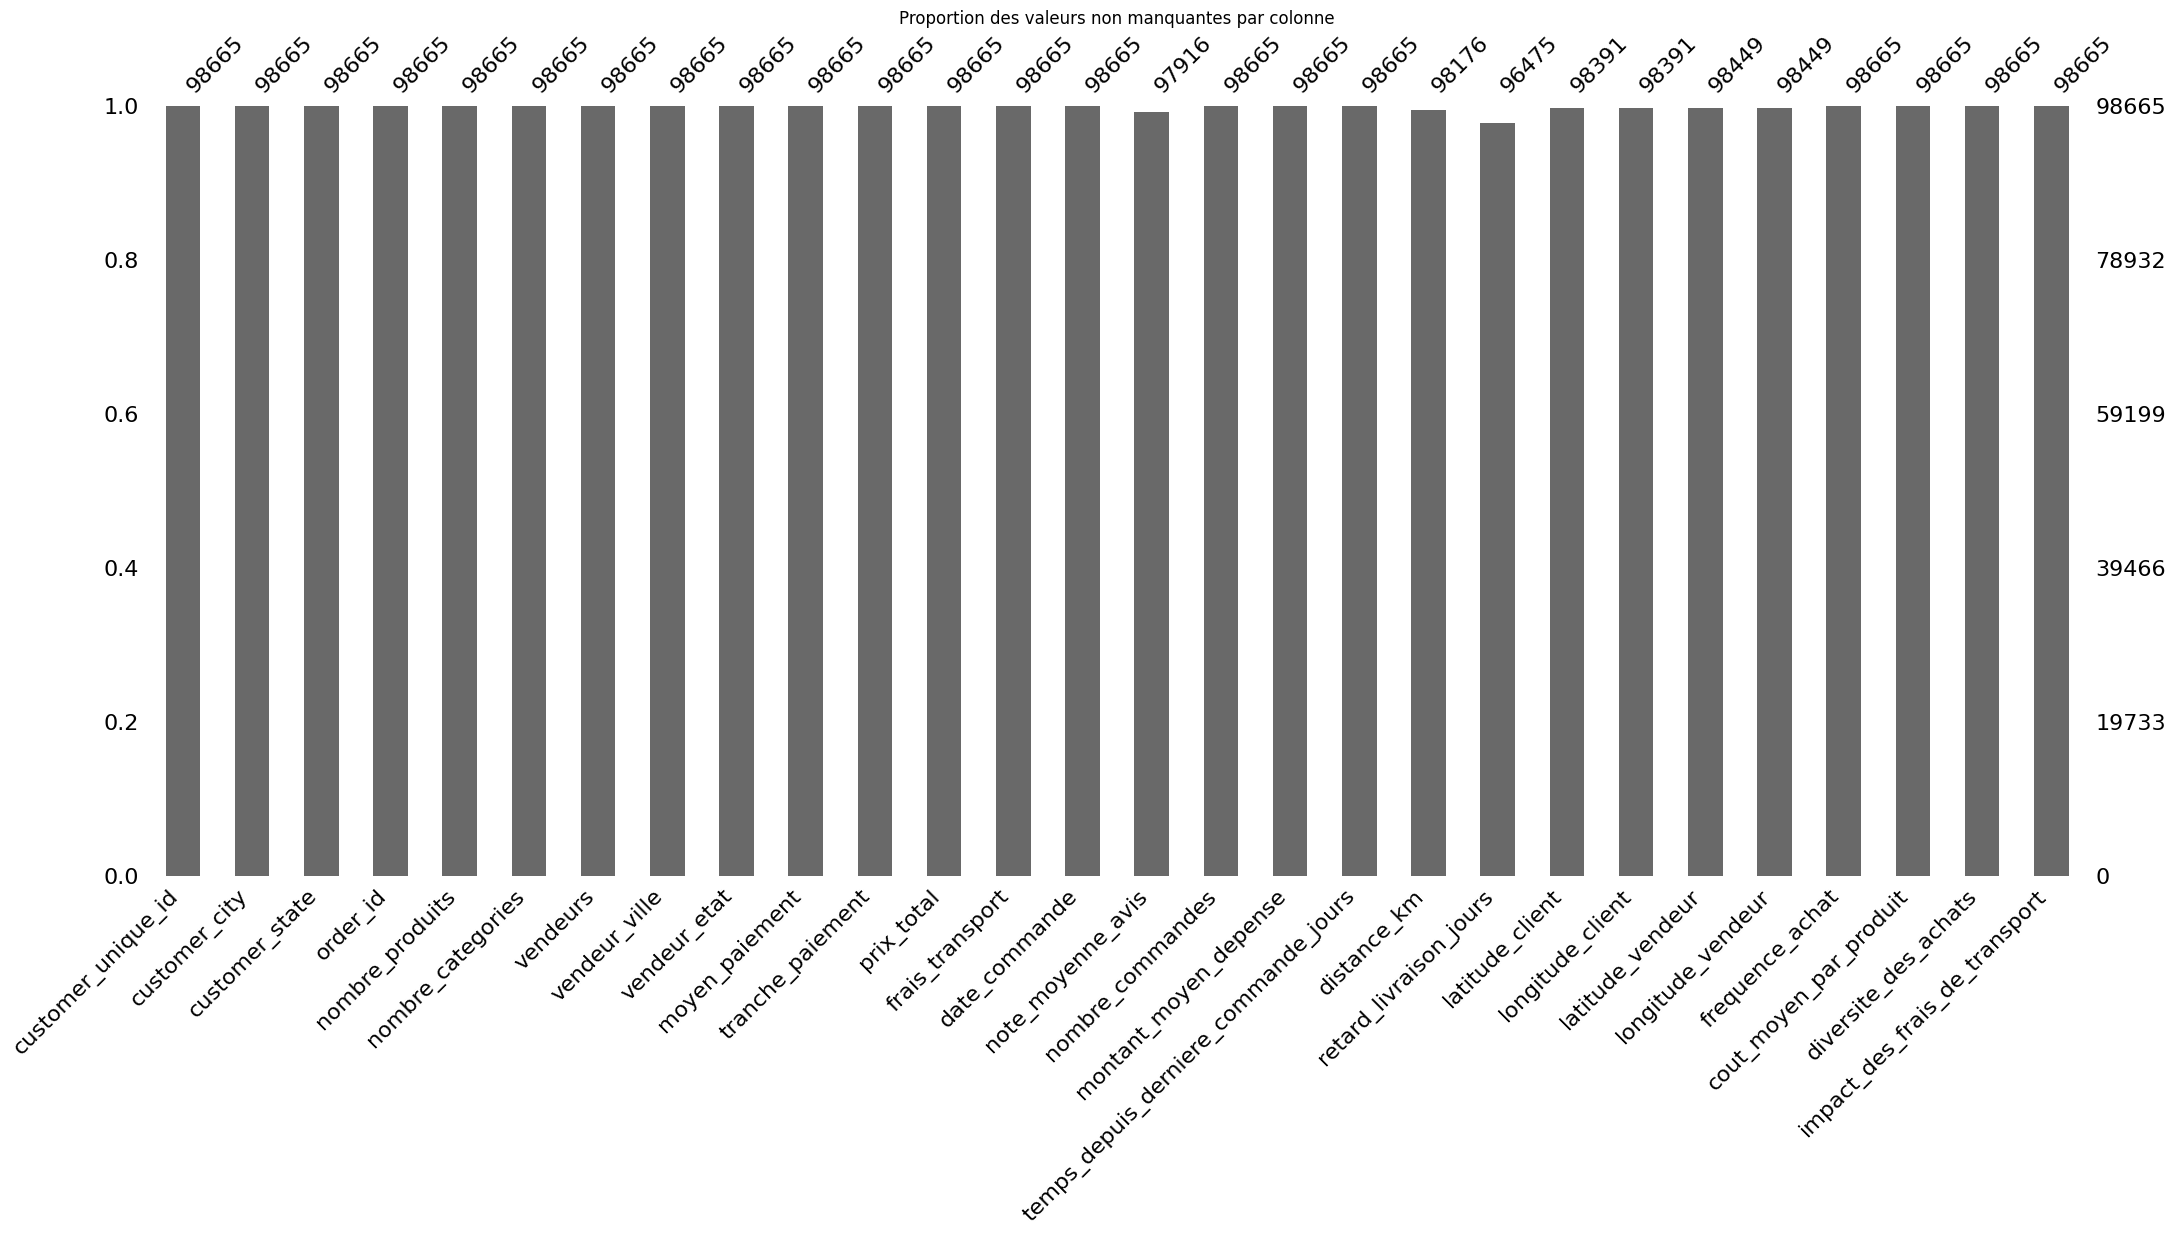

In [8]:
# Visualiser la proportion des valeurs manquantes sous forme de barres
plt.figure(figsize=(10,6))
msno.bar(df)
plt.title("Proportion des valeurs non manquantes par colonne")
plt.show()

In [ ]:
# Afficher les 10 premières lignes contenant des NaN
df_nan = df[df.isnull().any(axis=1)]
print(" Exemples de lignes contenant des valeurs manquantes :")
df_nan.head(10)


🔎 Exemples de lignes contenant des valeurs manquantes :


,customer_unique_id,customer_city,customer_state,order_id,nombre_produits,nombre_categories,vendeurs,vendeur_ville,vendeur_etat,moyen_paiement,...,distance_km,retard_livraison_jours,latitude_client,longitude_client,latitude_vendeur,longitude_vendeur,frequence_achat,cout_moyen_par_produit,diversite_des_achats,impact_des_frais_de_transport
44,001ae44fa04911a9e9577356dce6c63c,sao caetano do sul,SP,a59ef0abffbef8ddaae23600b6ee6604,1,1,1,cafelandia,SP,boleto,...,371.055712,NaN,-23.635292,-46.578288,-21.803201,-49.602213,0.003322,116.23,1.0,0.140497
58,0029bd580d3012618731f5abb174a07f,sao paulo,SP,7a43bbe9766ce937332b6f9dcba36715,1,1,1,sorocaba,SP,boleto,...,102.755305,NaN,-23.529819,-46.461783,-23.536890,-47.469687,0.003279,52.38,1.0,0.238259
68,002ed12115742033f015cb3c269ccf68,santo andre,SP,565f70f153b3d8a2684d6808ba284de7,1,1,1,sao paulo,SP,credit_card,...,NaN,-14.0,-23.641861,-46.500728,NaN,NaN,0.004630,109.79,1.0,0.108298
101,003f4901fdb60ae9c1e2538b84c208e1,brasilia,DF,7ff2fc53faa0627c1754a4b00e5f65f2,1,0,1,guarulhos,SP,credit_card,...,NaN,-5.0,NaN,NaN,-23.436711,-46.511340,0.003472,162.79,0.0,0.090853
124,004b45ec5c64187465168251cd1c9c2f,maceio,AL,90ae229a4addcfead792e2564554f09c,1,1,1,sao jose do rio preto,SP,boleto,...,1918.009210,NaN,-9.635532,-35.739750,-20.806707,-49.389165,0.020000,97.87,1.0,0.387964
145,0058f300f57d7b93c477a131a59b36c3,salvador,BA,2cfc79d9582e9135c0a9b61fa60e6b21,1,1,1,borda da mata,MG,voucher,...,1324.623164,NaN,-12.895629,-38.438767,-22.262584,-46.171124,0.018182,79.56,1.0,0.247109
170,006b297ed73773b17d8874a2eb4466e8,lauro de freitas,BA,f2a5651dedee83dc9eba7d0cb9703660,1,1,1,belo horizonte,MG,credit_card,...,NaN,-8.0,NaN,NaN,-19.917826,-43.942418,0.006803,108.46,1.0,0.171123
237,009a0802534f904b40b9d512b49794e1,rio de janeiro,RJ,b5d9716785ce349830c74805f925c745,1,1,1,sao paulo,SP,credit_card,...,365.205647,NaN,-22.931071,-43.176116,-23.543610,-46.687839,0.003436,91.29,1.0,0.156534
249,00a39521eb40f7012db50455bf083460,brasilia,DF,7d32c87acba91ed87ebd98310fe1c54d,1,1,1,jau,SP,credit_card,...,NaN,-16.0,NaN,NaN,-22.275249,-48.543584,0.021739,96.47,1.0,0.275422
250,00a39521eb40f7012db50455bf083460,brasilia,DF,cea3e6c11eb60acb9d8d4d51694832f8,1,1,1,sao paulo,SP,credit_card,...,NaN,-22.0,NaN,NaN,-23.538269,-46.639423,0.021739,26.78,1.0,0.568708


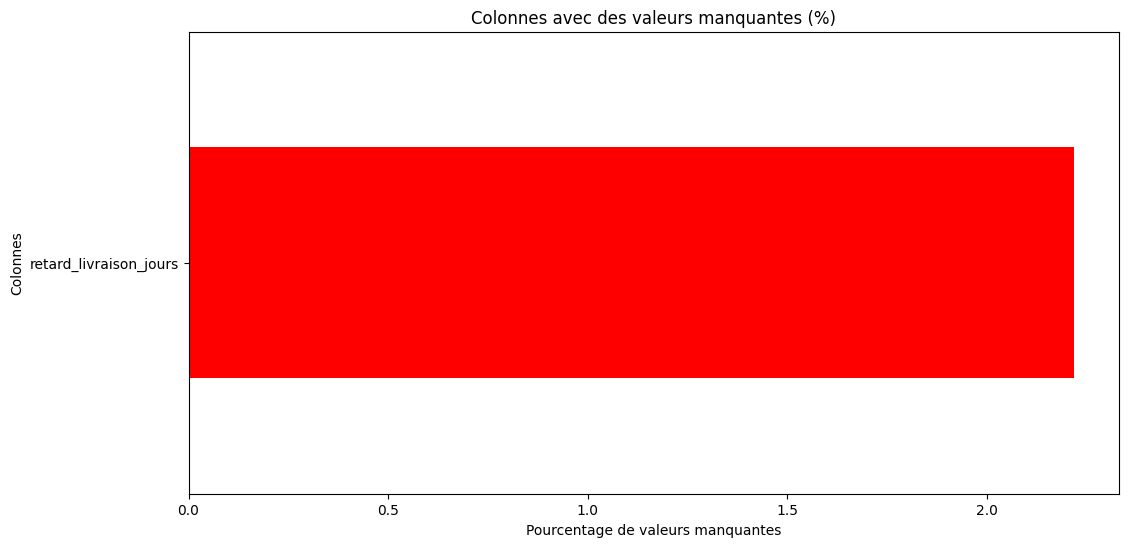

In [10]:
# Calcul du % de valeurs manquantes
missing_percentage = df.isnull().sum() / len(df) * 100

# Filtrer les colonnes ayant au moins 1% de valeurs manquantes
missing_percentage = missing_percentage[missing_percentage > 1]

# Affichage sous forme de bar plot
plt.figure(figsize=(12,6))
missing_percentage.sort_values().plot(kind="barh", color="red")
plt.xlabel("Pourcentage de valeurs manquantes")
plt.ylabel("Colonnes")
plt.title("Colonnes avec des valeurs manquantes (%)")
plt.show()


In [14]:
df.shape
df_cleaned=df.dropna()

In [ ]:

# Afficher un aperçu des valeurs manquantes
print("Aperçu des valeurs manquantes :\n")
print(df_cleaned.isnull().sum())  # Nombre de valeurs NaN par colonne



🔎 Aperçu des valeurs manquantes :

customer_unique_id                      0
customer_city                           0
customer_state                          0
order_id                                0
nombre_produits                         0
nombre_categories                       0
vendeurs                                0
vendeur_ville                           0
vendeur_etat                            0
moyen_paiement                          0
tranche_paiement                        0
prix_total                              0
frais_transport                         0
date_commande                           0
note_moyenne_avis                       0
nombre_commandes                        0
montant_moyen_depense                   0
temps_depuis_derniere_commande_jours    0
distance_km                             0
retard_livraison_jours                  0
latitude_client                         0
longitude_client                        0
latitude_vendeur                        0

<Figure size 1000x600 with 0 Axes>

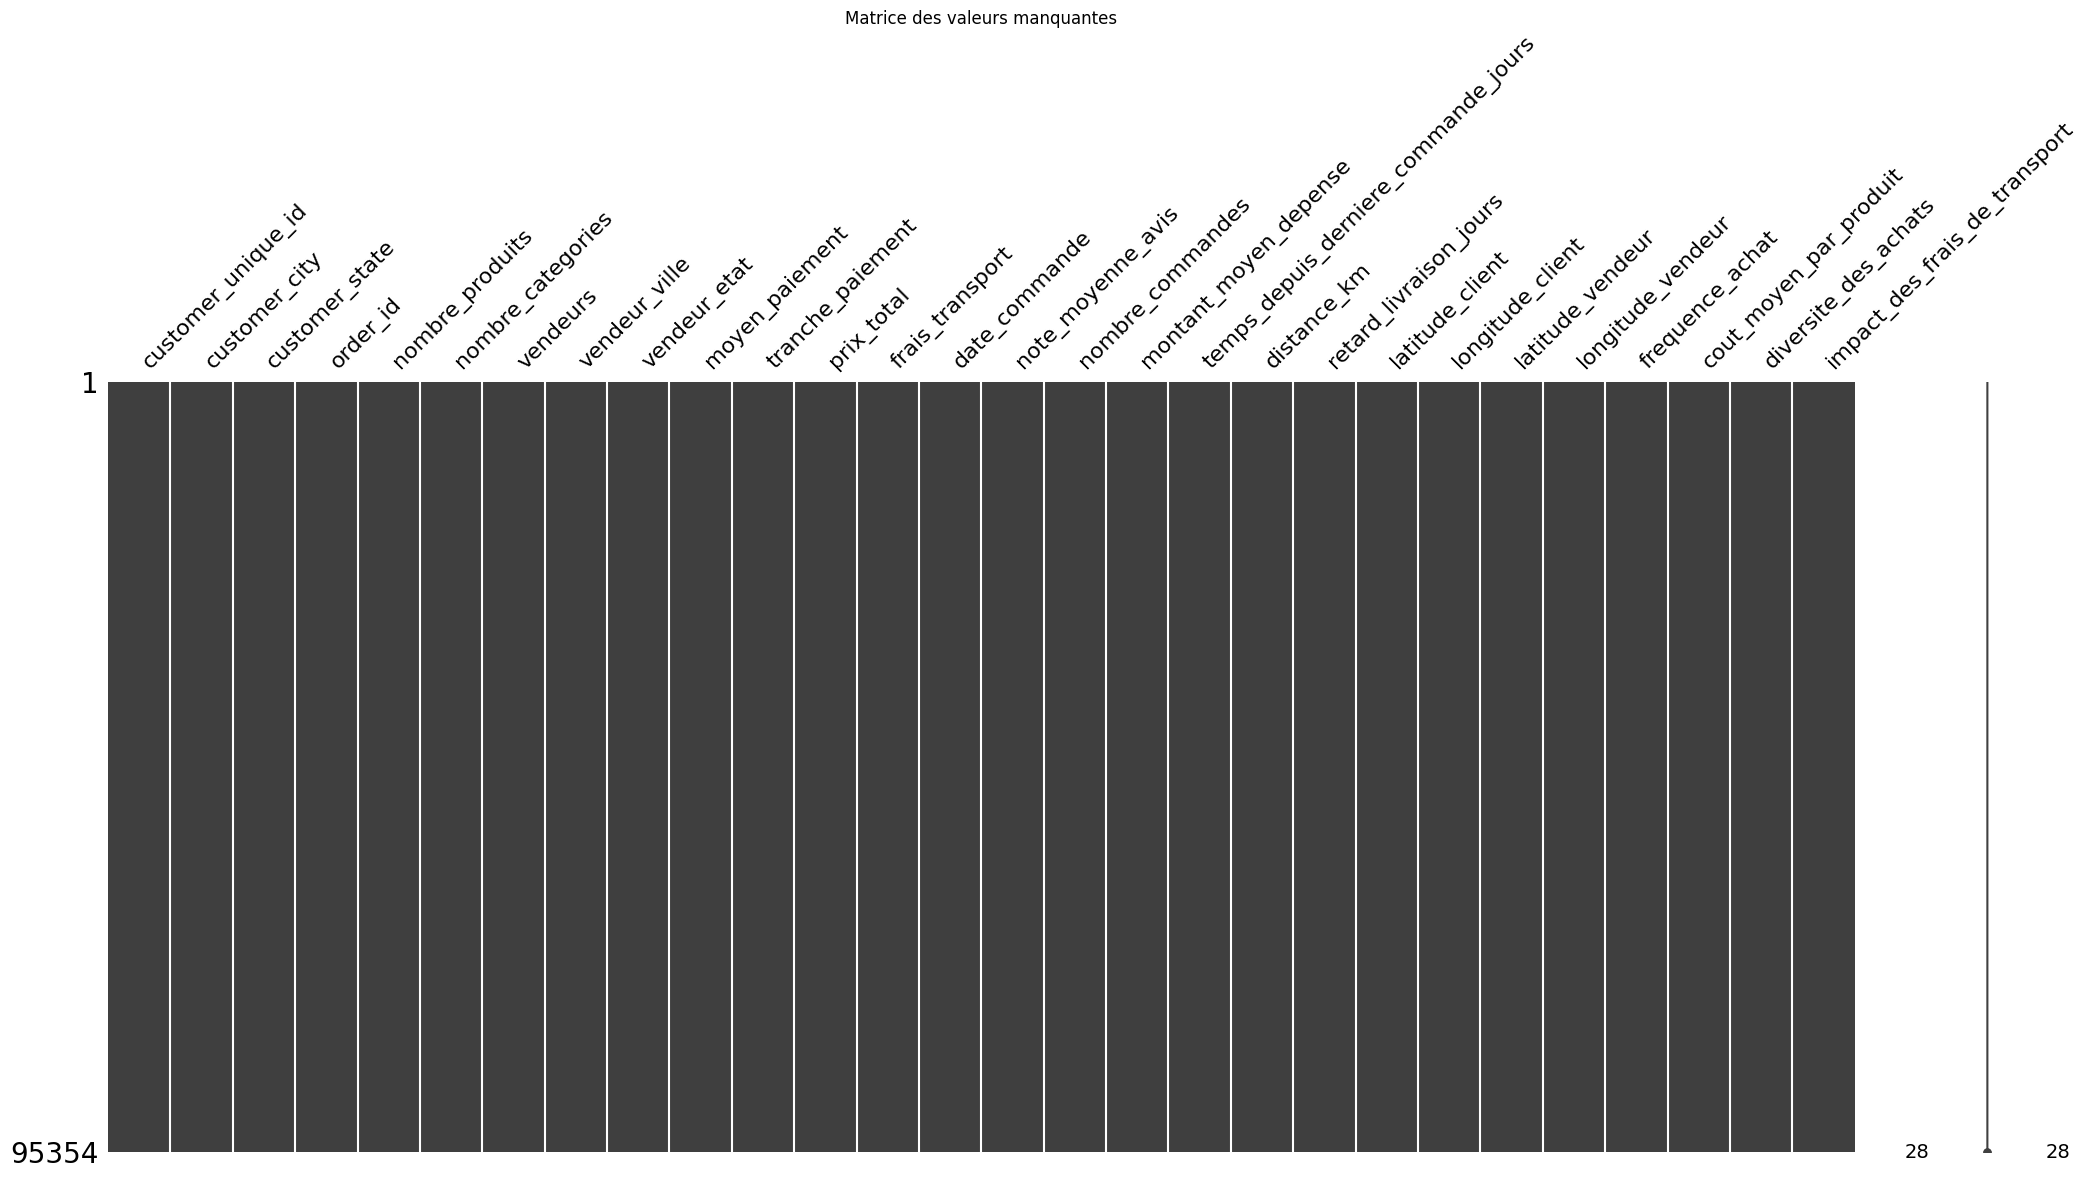

In [16]:
# Visualiser les valeurs manquantes sous forme de matrice
plt.figure(figsize=(10,6))
msno.matrix(df_cleaned)
plt.title("Matrice des valeurs manquantes")
plt.show()

VALEURS ABERANTES

In [ ]:


# Afficher les statistiques descriptives
print("Aperçu des statistiques des variables numériques :\n")
df_cleaned.describe()



🔎 Aperçu des statistiques des variables numériques :



,nombre_produits,nombre_categories,vendeurs,tranche_paiement,prix_total,frais_transport,note_moyenne_avis,nombre_commandes,montant_moyen_depense,temps_depuis_derniere_commande_jours,distance_km,retard_livraison_jours,latitude_client,longitude_client,latitude_vendeur,longitude_vendeur,frequence_achat,cout_moyen_par_produit,diversite_des_achats,impact_des_frais_de_transport
count,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000
mean,1.198691,0.993865,1.013854,2.909027,205.340760,23.933746,4.155858,1.305462,157.254186,240.730698,600.389647,-11.921377,-21.204312,-46.194533,-22.795439,-47.224595,0.012219,157.001960,0.917701,0.205077
std,0.747868,0.147603,0.123430,2.694302,609.701075,25.788265,1.283873,1.029969,214.258633,152.484539,593.334959,10.112940,5.599174,4.053523,2.755942,2.350215,0.028320,215.153776,0.214942,0.156556
min,1.000000,0.000000,1.000000,0.000000,9.590000,0.000000,1.000000,1.000000,1.856818,4.000000,0.000000,-147.000000,-33.689948,-72.668881,-32.079231,-63.893565,0.001429,1.737500,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,62.770000,14.050000,4.000000,1.000000,60.950000,117.000000,185.757686,-17.000000,-23.590285,-48.121284,-23.612734,-48.807104,0.003185,60.000000,1.000000,0.106161
50%,1.000000,1.000000,1.000000,2.000000,109.775000,17.600000,5.000000,1.000000,103.645000,222.000000,433.779886,-12.000000,-22.926257,-46.632926,-23.425556,-46.744092,0.005291,103.020000,1.000000,0.170509
75%,1.000000,1.000000,1.000000,4.000000,195.917500,25.630000,5.000000,1.000000,174.457500,349.000000,798.312132,-7.000000,-20.140216,-43.642950,-21.757321,-46.518679,0.010870,174.140000,1.000000,0.265399
max,63.000000,3.000000,5.000000,24.000000,109312.640000,1794.960000,5.000000,75.000000,13664.080000,699.000000,8677.923608,188.000000,42.184003,-8.723762,-2.501242,-34.855616,1.142857,13664.080000,1.000000,6.820144


In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # Premier quartile (25%)
    Q3 = df[column].quantile(0.75)  # Troisième quartile (75%)
    IQR = Q3 - Q1  # Intervalle interquartile
    lower_bound = Q1 - 1.5 * IQR  # Seuil inférieur
    upper_bound = Q3 + 1.5 * IQR  # Seuil supérieur
    
    # Filtrer les outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f" {column}: {len(outliers)} valeurs aberrantes détectées")
    return outliers

# Appliquer la détection sur toutes les colonnes numériques
outlier_dict = {}
for col in df_cleaned.select_dtypes(include=[np.number]).columns:
    outlier_dict[col] = detect_outliers_iqr(df_cleaned, col)


📌 nombre_produits: 12490 valeurs aberrantes détectées
📌 nombre_categories: 2036 valeurs aberrantes détectées
📌 vendeurs: 1255 valeurs aberrantes détectées
📌 tranche_paiement: 5873 valeurs aberrantes détectées
📌 prix_total: 9236 valeurs aberrantes détectées
📌 frais_transport: 9237 valeurs aberrantes détectées
📌 note_moyenne_avis: 12184 valeurs aberrantes détectées
📌 nombre_commandes: 17051 valeurs aberrantes détectées
📌 montant_moyen_depense: 7420 valeurs aberrantes détectées
📌 temps_depuis_derniere_commande_jours: 66 valeurs aberrantes détectées
📌 distance_km: 7354 valeurs aberrantes détectées
📌 retard_livraison_jours: 4193 valeurs aberrantes détectées
📌 latitude_client: 15533 valeurs aberrantes détectées
📌 longitude_client: 4032 valeurs aberrantes détectées
📌 latitude_vendeur: 8728 valeurs aberrantes détectées
📌 longitude_vendeur: 4335 valeurs aberrantes détectées
📌 frequence_achat: 11836 valeurs aberrantes détectées
📌 cout_moyen_par_produit: 7417 valeurs aberrantes détectées
📌 divers

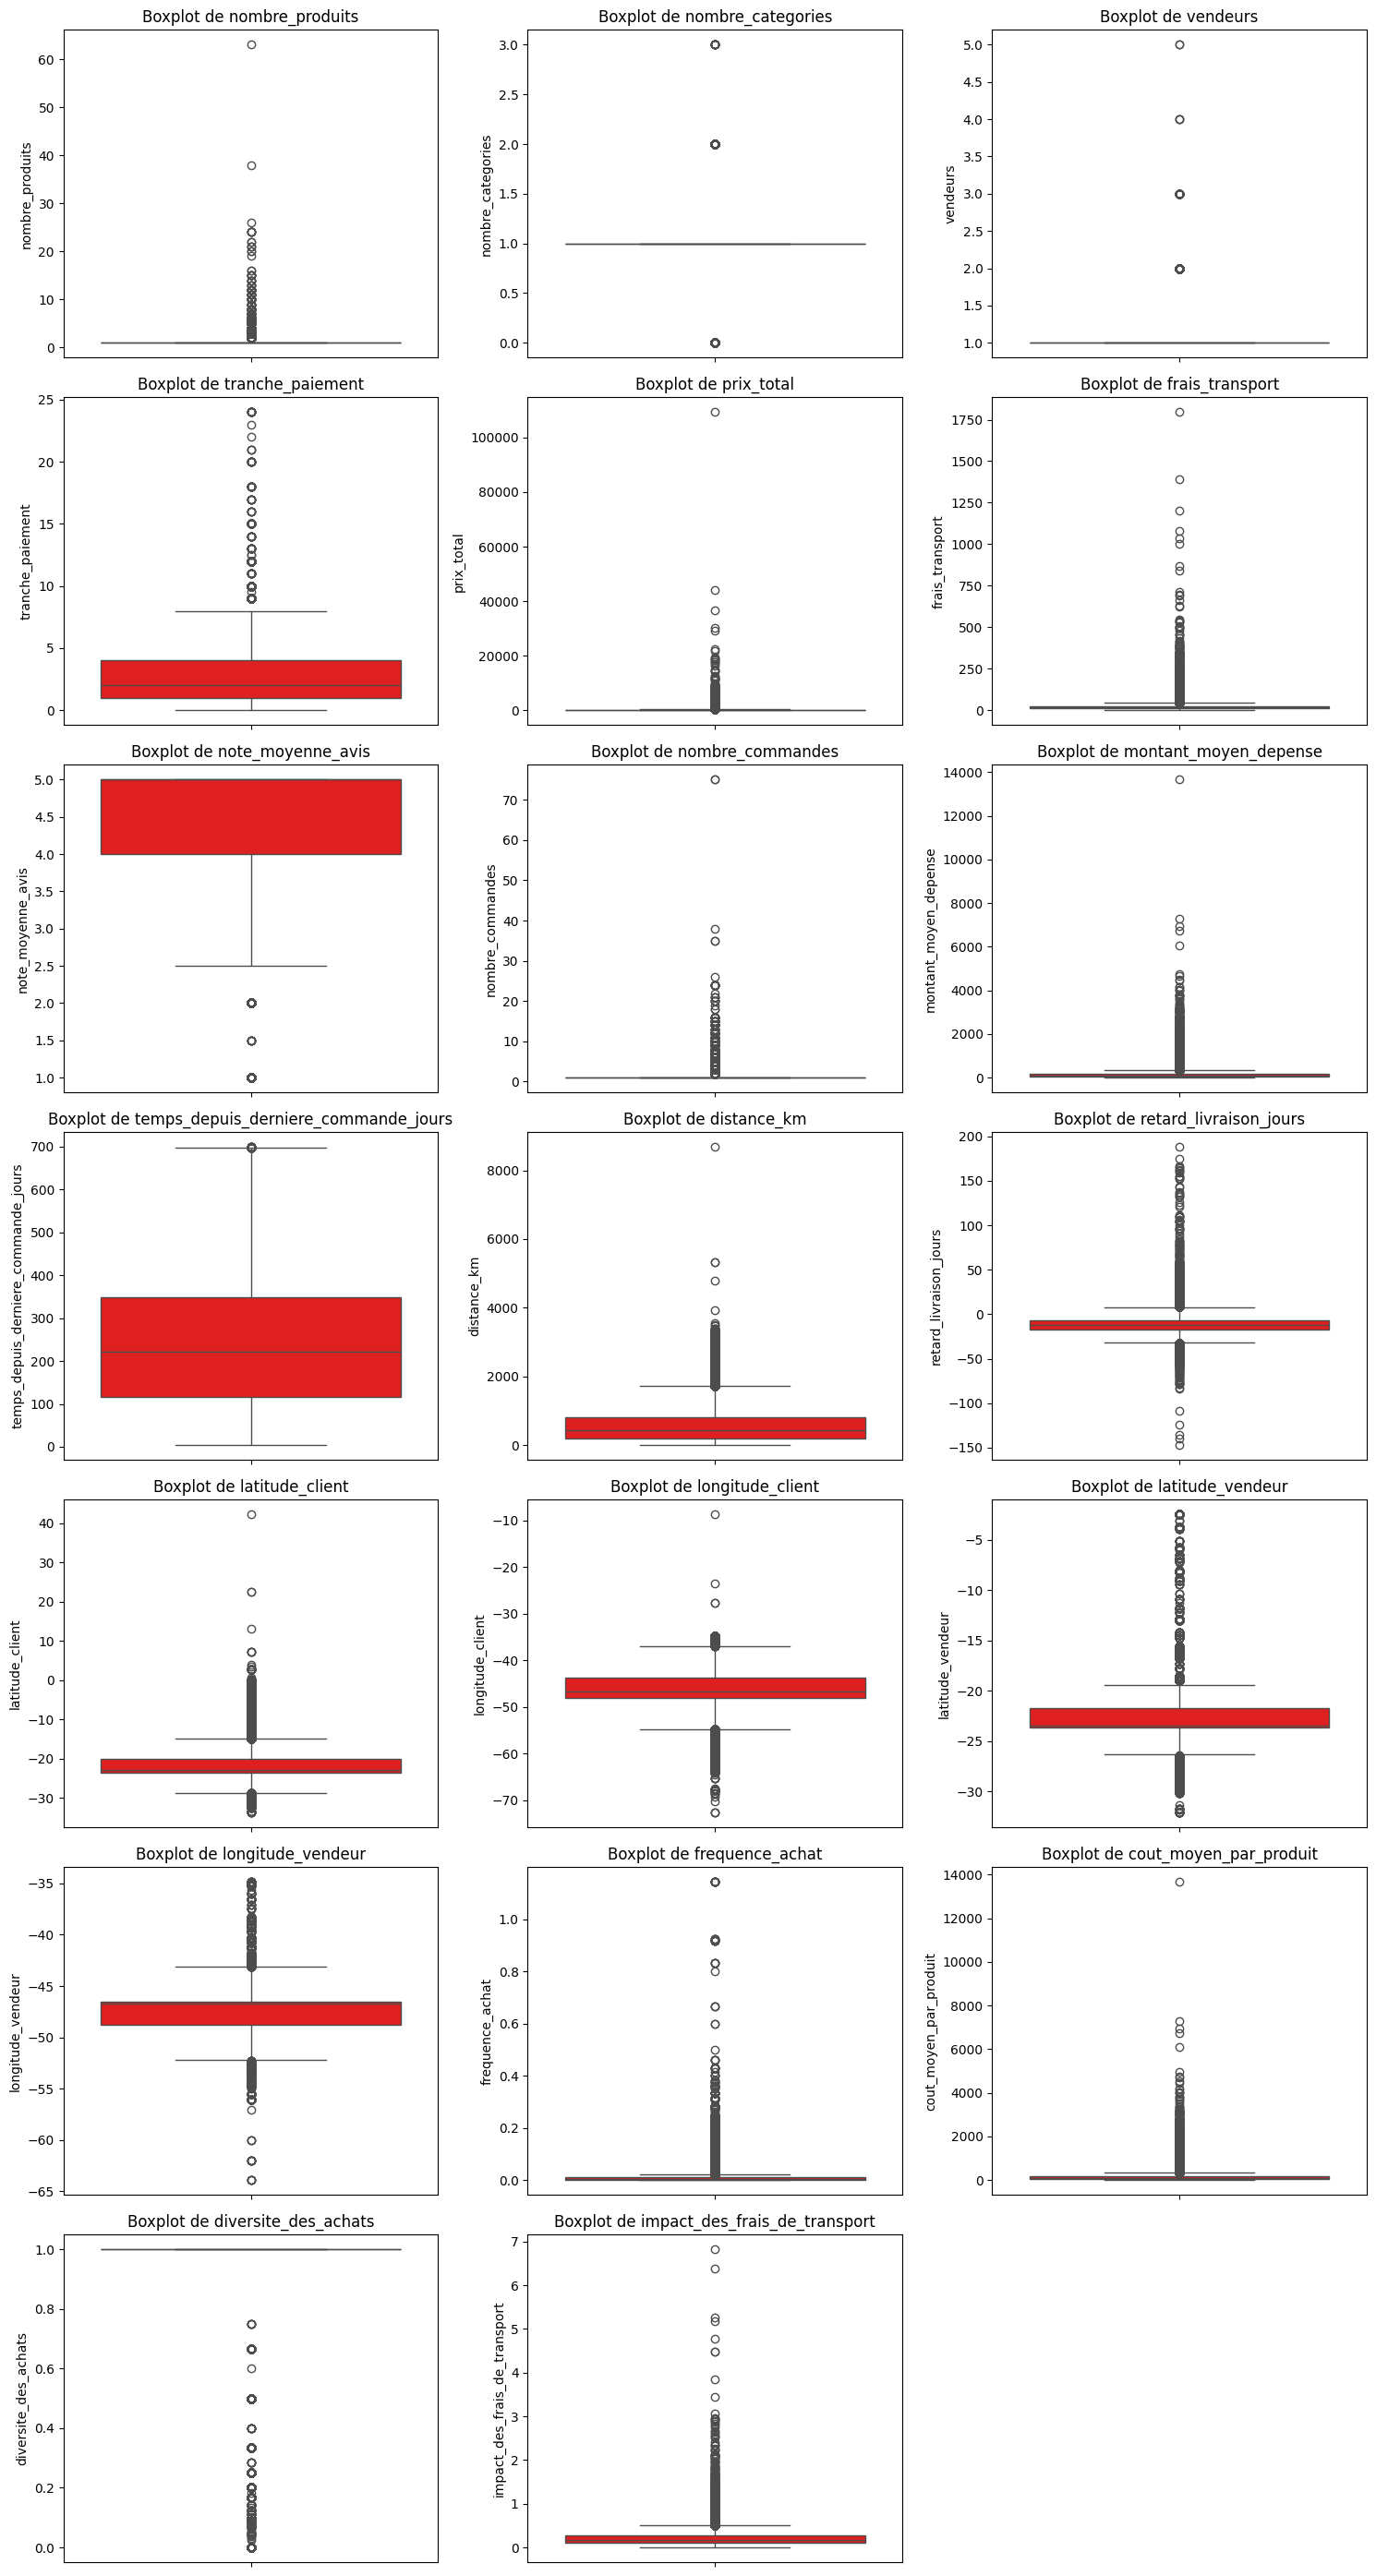

In [19]:


# Liste des colonnes numériques
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns

# Calculer le nombre de lignes et colonnes nécessaires
num_cols = len(numeric_cols)
num_rows = math.ceil(num_cols / 3)  # On arrondit à l'entier supérieur

# Créer une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))

# Aplatir la liste des axes pour éviter les erreurs d'indexation
axes = axes.flatten()

# Générer les boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df_cleaned[col], ax=axes[i], color="red")
    axes[i].set_title(f"Boxplot de {col}")

# Supprimer les sous-graphiques vides
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


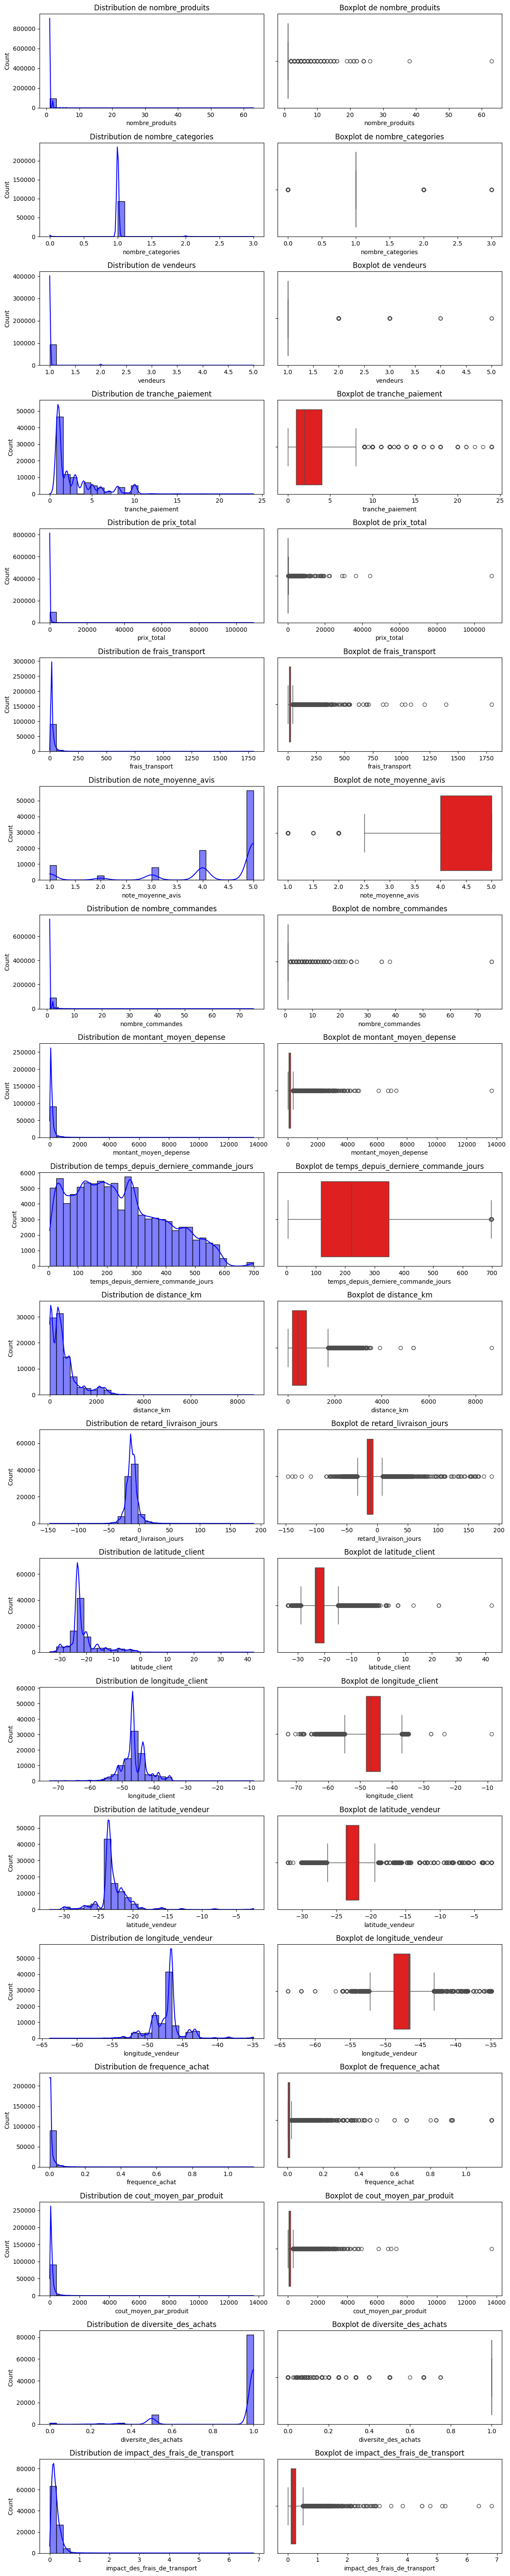

In [20]:


# Sélection des colonnes numériques
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns

# Création des graphiques
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(12, len(numeric_cols) * 3))

for i, col in enumerate(numeric_cols):
    # Histogramme
    sns.histplot(df_cleaned[col], ax=axes[i, 0], bins=30, kde=True, color='blue')
    axes[i, 0].set_title(f"Distribution de {col}")

    # Boxplot
    sns.boxplot(x=df_cleaned[col], ax=axes[i, 1], color='red')
    axes[i, 1].set_title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()


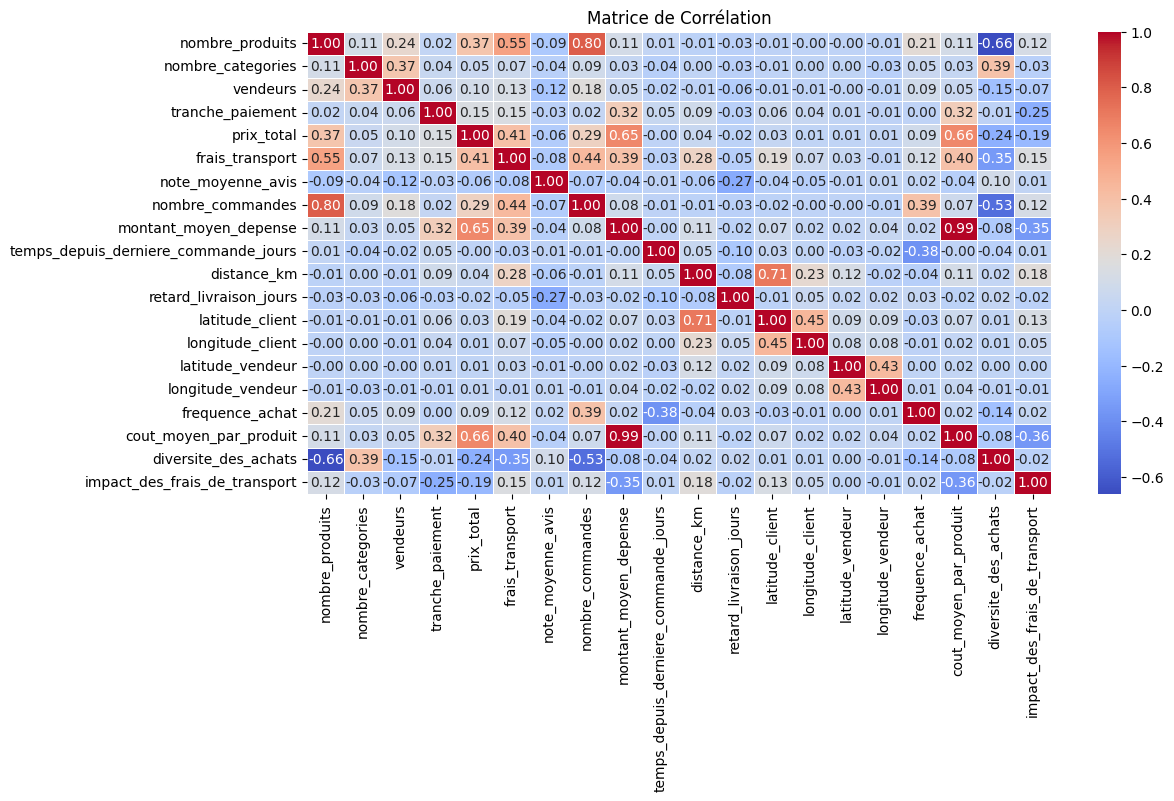

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()


In [28]:
df_cleaned.columns

Index(['customer_unique_id', 'customer_city', 'customer_state', 'order_id',
       'nombre_produits', 'nombre_categories', 'vendeurs', 'vendeur_ville',
       'vendeur_etat', 'moyen_paiement', 'tranche_paiement', 'prix_total',
       'frais_transport', 'date_commande', 'note_moyenne_avis',
       'nombre_commandes', 'montant_moyen_depense',
       'temps_depuis_derniere_commande_jours', 'distance_km',
       'retard_livraison_jours', 'latitude_client', 'longitude_client',
       'latitude_vendeur', 'longitude_vendeur', 'frequence_achat',
       'cout_moyen_par_produit', 'diversite_des_achats',
       'impact_des_frais_de_transport', 'frequence_achat_norm',
       'cout_moyen_par_produit_norm', 'diversite_des_achats_norm',
       'note_moyenne_avis_norm', 'score_engagement', 'segment_client'],
      dtype='object')

In [ ]:


df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
df_cleaned.fillna({
    'nombre_commandes': 0,
    'note_moyenne_avis': df_cleaned['note_moyenne_avis'].mean(),
    'prix_total': df_cleaned['prix_total'].median(),
    'frequence_achat': 0,
    'cout_moyen_par_produit': df_cleaned['prix_total'] / df_cleaned['nombre_produits'].replace(0, np.nan),
    'diversite_des_achats': 0,
    'impact_des_frais_de_transport': 0,
    'montant_moyen_depense': df_cleaned['montant_moyen_depense'].median(),
    'temps_depuis_derniere_commande_jours': df_cleaned['temps_depuis_derniere_commande_jours'].max()  # Pour éviter les biais
}, inplace=True)

# Sélection des métriques les plus pertinentes
metrics = [
    'frequence_achat', 'nombre_commandes', 'cout_moyen_par_produit', 
    'montant_moyen_depense', 'diversite_des_achats', 'nombre_categories', 
    'note_moyenne_avis', 'temps_depuis_derniere_commande_jours', 
    'impact_des_frais_de_transport'
]

# Normalisation Min-Max
for metric in metrics:
    df_cleaned[f'{metric}_norm'] = (df_cleaned[metric] - df_cleaned[metric].min()) / (df_cleaned[metric].max() - df_cleaned[metric].min())

# Inversion de la normalisation pour `temps_depuis_derniere_commande_jours` (un score bas = plus récent = plus engagé)
df_cleaned['temps_depuis_derniere_commande_jours_norm'] = 1 - df_cleaned['temps_depuis_derniere_commande_jours_norm']

# Calcul du score d'engagement
df_cleaned['score_engagement'] = df_cleaned[[f'{m}_norm' for m in metrics]].mean(axis=1)


C:\Users\ahmad\AppData\Local\Temp\ipykernel_1056\533232996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\ahmad\AppData\Local\Temp\ipykernel_1056\533232996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.fillna({
C:\Users\ahmad\AppData\Local\Temp\ipykernel_1056\533232996.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [ ]:


# Définir les seuils pour classer les clients
seuil_haut = df_cleaned["score_engagement"].quantile(0.66)  
seuil_bas = df_cleaned["score_engagement"].quantile(0.33)  

# Fonction pour classifier les clients
def classifier_client(score):
    if score >= seuil_haut:
        return 2  # Engagé
    elif score <= seuil_bas:
        return 0  # Churn
    else:
        return 1  # Modéré

# Appliquer la classification
df_cleaned["segment_client"] = df_cleaned["score_engagement"].apply(classifier_client)

# Vérification de la distribution des classes
df_cleaned["segment_client"].value_counts(normalize=True)


C:\Users\ahmad\AppData\Local\Temp\ipykernel_1056\1761187004.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["segment_client"] = df_cleaned["score_engagement"].apply(classifier_client)


segment_client
2    0.340007
0    0.330002
1    0.329991
Name: proportion, dtype: float64

Répartition des classes :
Classe 2: 32421 (34.00%)
Classe 0: 31467 (33.00%)
Classe 1: 31466 (33.00%)


C:\Users\ahmad\AppData\Local\Temp\ipykernel_1056\683929541.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


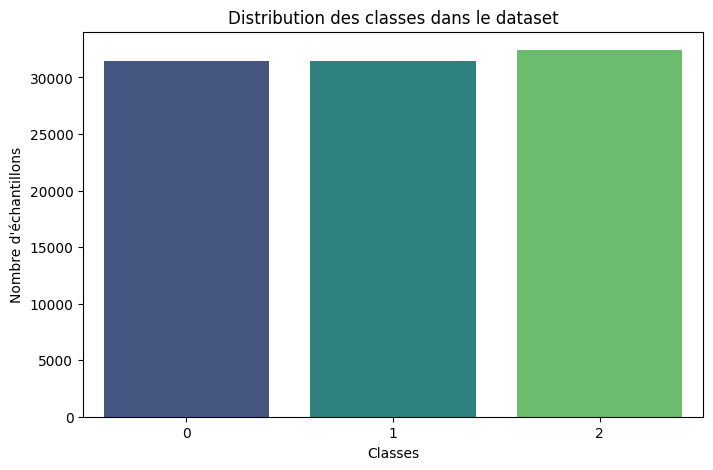

In [32]:

target = 'segment_client'  
y = df_cleaned[target]

# Vérifier la répartition des classes
class_counts = y.value_counts()
total = len(y)

# Affichage des proportions
print("Répartition des classes :")
for classe, count in class_counts.items():
    print(f"Classe {classe}: {count} ({(count / total) * 100:.2f}%)")

# Visualisation
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xlabel("Classes")
plt.ylabel("Nombre d'échantillons")
plt.title("Distribution des classes dans le dataset")
plt.show()


In [ ]:


target_count = 31466

# Séparer les classes
df_class_0 = df_cleaned[df_cleaned['segment_client'] == 0]
df_class_1 = df_cleaned[df_cleaned['segment_client'] == 1]
df_class_2 = df_cleaned[df_cleaned['segment_client'] == 2]

# Sous-échantillonnage  des classes majoritaires
df_class_0 = df_class_0.sample(target_count, random_state=42)
df_class_2 = df_class_2.sample(target_count, random_state=42)

# Suréchantillonnage de la classe minoritaire
df_class_1 = df_class_1.sample(target_count, replace=True, random_state=42)

# Fusion des nouvelles classes équilibrées
df_balanced = pd.concat([df_class_0, df_class_1, df_class_2])

# Vérification de la distribution après équilibrage
df_balanced['segment_client'].value_counts()


segment_client
0    31466
1    31466
2    31466
Name: count, dtype: int64

Répartition des classes :
Classe 0: 31466 (33.33%)
Classe 1: 31466 (33.33%)
Classe 2: 31466 (33.33%)


C:\Users\ahmad\AppData\Local\Temp\ipykernel_1056\2297250187.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


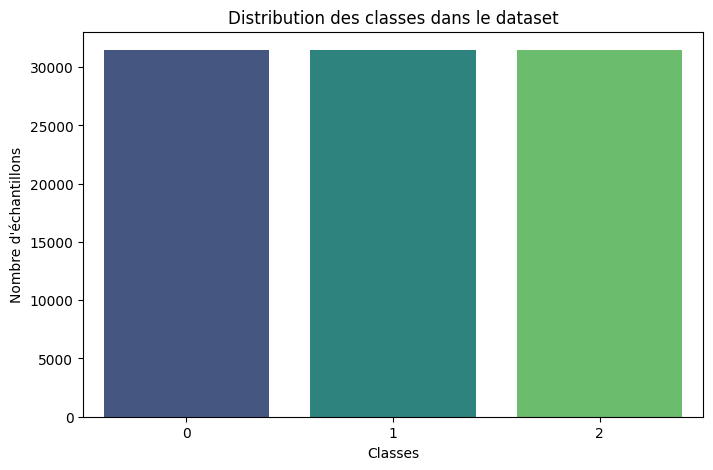

In [36]:


target = 'segment_client'  
y = df_balanced[target]

# Vérifier la répartition des classes
class_counts = y.value_counts()
total = len(y)

# Affichage des proportions
print("Répartition des classes :")
for classe, count in class_counts.items():
    print(f"Classe {classe}: {count} ({(count / total) * 100:.2f}%)")

# Visualisation
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xlabel("Classes")
plt.ylabel("Nombre d'échantillons")
plt.title("Distribution des classes dans le dataset")
plt.show()


In [37]:

df_balanced.to_csv("datasets_cleaned_balanced.csv", index=False)